# PDF 데이터를 활용한 그래프 그리기

In [2]:
import matplotlib.pyplot as plt # matplotlib 패키지의 pyplot 모듈
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("../isec_train.csv", index_col=0)
df

,/JS,/AA,/OpenAction,/AcroForm,/RichMedia,/Launch,/EmbeddedFile,/XFA,/URI,/F,...,mkdir,replace,fromCharCode,getAnnots,ip,xref_size,trailer_size,file_size,nof_stream,class
file_000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,21,21,67.784,5,0
file_001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,98,174,14.627,23,0
file_002,2,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,10,10,16.013,8,1
file_003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,21,21,63.609,5,0
file_004,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,4,29,37,83.376,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
file_495,2,0,1,0,0,0,0,0,0,0,...,0,0,1,1,1,10,10,8.181,8,1
file_496,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,11,11,8.118,9,1
file_497,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,4,25,33,78.263,28,0
file_498,2,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,11,11,8.157,9,1


## 통계적 검증
### 귀무가설
- 특정 분포를 따른다. (특정 분포 :'norm', 'expon', 'logistic', 'gumbel', 'gumbel_l', 'gumbel_r', 'extreme1'로 지정)
- 이때, 기본 값은 norm으로 정규분포를 따른다는 귀무가설을 검정한다. (참고로 extrame1, gumbel_l은 같은 분포를 의미함)
- 쉽게 표현하자면 '차이가 없다'라고 주장하는 가설이라고 보시면 됩니다. 그리고, 이 가설이 맞지 않음을 즉, '차이가 있음'을 통계학적 증거로 증명하면 됩니다.

In [8]:
import scipy.stats as stats

0.08759716396098596
-1.8149138388859165


In [7]:
from scipy.stats import anderson
columns = df.columns
plt.clf()
for col in columns:
    data = df[col]
    anderson_result = anderson(data)
    shapiro_test = stats.shapiro(data)
    print(shapiro_test, type(shapiro_test))
    print(f'검정 통계치 : {anderson_result[0]}')
    print(f'임계지점의 통계치 : {anderson_result[1][-1]}')
    print(f'각 임계 지점의 P-value : {anderson_result[2]}')


ShapiroResult(statistic=np.float64(0.6837260760833517), pvalue=np.float64(1.6439810279204166e-29)) <class 'scipy.stats._morestats.ShapiroResult'>
검정 통계치 : 80.54171345486225
임계지점의 통계치 : 1.083
각 임계 지점의 P-value : [15.  10.   5.   2.5  1. ]
ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0)) <class 'scipy.stats._morestats.ShapiroResult'>
검정 통계치 : nan
임계지점의 통계치 : 1.083
각 임계 지점의 P-value : [15.  10.   5.   2.5  1. ]
ShapiroResult(statistic=np.float64(0.6354014640669097), pvalue=np.float64(3.253287021626061e-31)) <class 'scipy.stats._morestats.ShapiroResult'>
검정 통계치 : 90.03206117668788
임계지점의 통계치 : 1.083
각 임계 지점의 P-value : [15.  10.   5.   2.5  1. ]
ShapiroResult(statistic=np.float64(0.3855760996095007), pvalue=np.float64(6.723756551069841e-38)) <class 'scipy.stats._morestats.ShapiroResult'>
검정 통계치 : 156.7037699656246
임계지점의 통계치 : 1.083
각 임계 지점의 P-value : [15.  10.   5.   2.5  1. ]
ShapiroResult(statistic=np.float64(1.0), pvalue=np.float64(1.0)) <class 'scipy.stats._morestats.Shapir

/Users/sonjinhyuk/workspace/CSRC_training/venv/lib/python3.9/site-packages/scipy/stats/_morestats.py:2248: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s
/Users/sonjinhyuk/workspace/CSRC_training/venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


<Figure size 640x480 with 0 Axes>

- 데이터 분포에 따른 왜도, 첨도
- 왜도
    - 분포의 비대칭도
    - 정규분포 = 왜도 0
    - 왼쪽으로 치우침 = 왜도 > 0
    - 오른쪽으로 치우침 = 왜도 < 0
- 첨도
    - 확률분포의 뾰족한 정도
    - 정규분포 = 첨도 0(Pearson 첨도 = 3)
    - 위로 뾰족함 = 첨도 > 0(Pearson 첨도 >3)
    - 아래로 뾰족함 = 첨도 < 0 (Pearson 첨도 < 3)

In [ ]:
from scipy.stats import skew, kurtosis
print(skew(df['/JS']))
print(kurtosis(df['/JS'], fisher=True))

![skew,kurtosis](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbydVNd%2FbtqJPCBsLAp%2FTBQGpvVfBThfmYuMtSXTmk%2Fimg.jpg)

## feature별 분포 확인

In [ ]:
import seaborn as sns

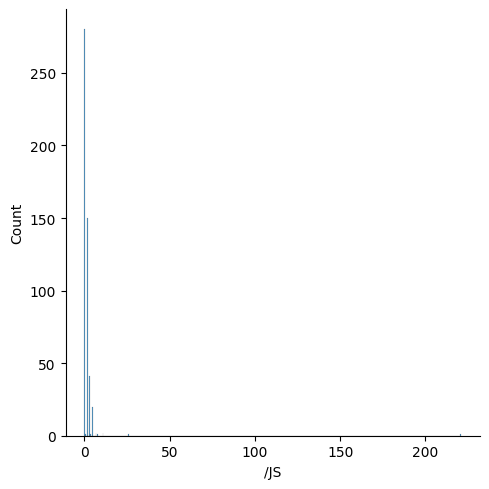

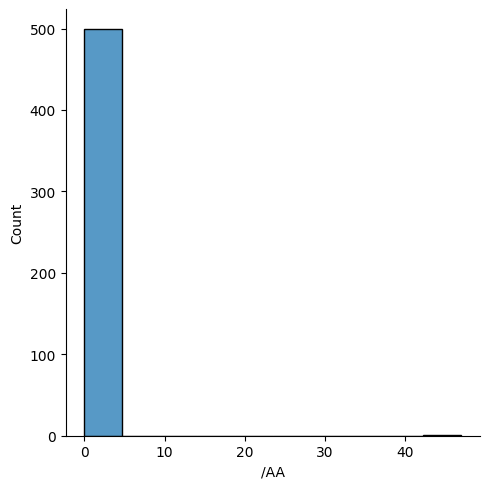

In [41]:
sns.displot(df['/JS'])
sns.displot(df['/AA'])

((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

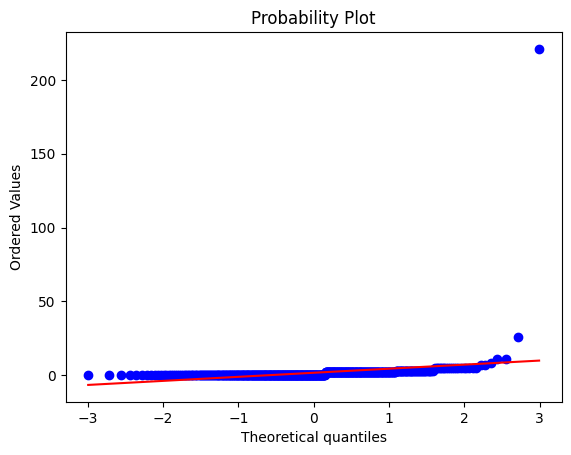

In [42]:
stats.probplot(df['/JS'], plot=plt)

458.96525193959326

## 데이터 분포 및 qq-plot 확인

In [38]:
columns = df.columns
plt.clf()
for col in columns:
    data = df[col]
    fig, ax = plt.subplots(2, 1)
    ax1 = plt.subplot(221)
    sns.histplot(data, ax=ax[0],kde=True)
    ax2 = plt.subplot(222)
    stats.probplot(data, plot=plt)
    fig.suptitle(col)
    plt.show()
    plt.clf()

<Figure size 640x480 with 0 Axes>

## box plot

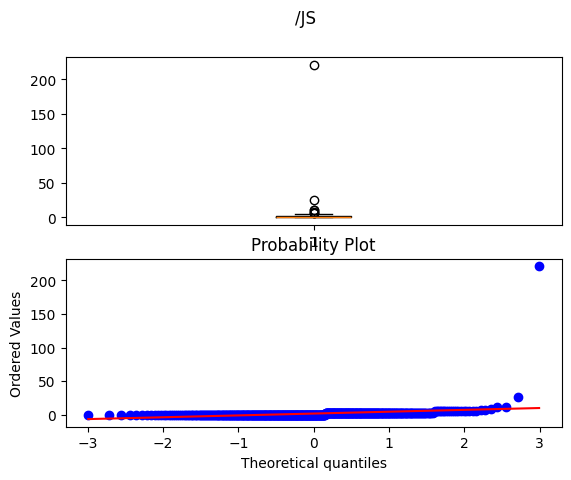

<Figure size 640x480 with 0 Axes>

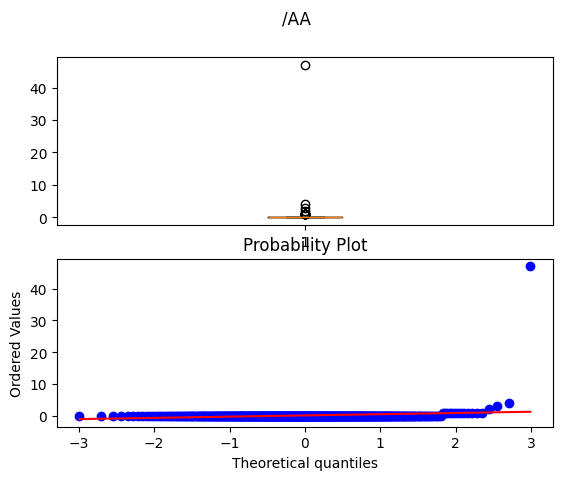

<Figure size 640x480 with 0 Axes>

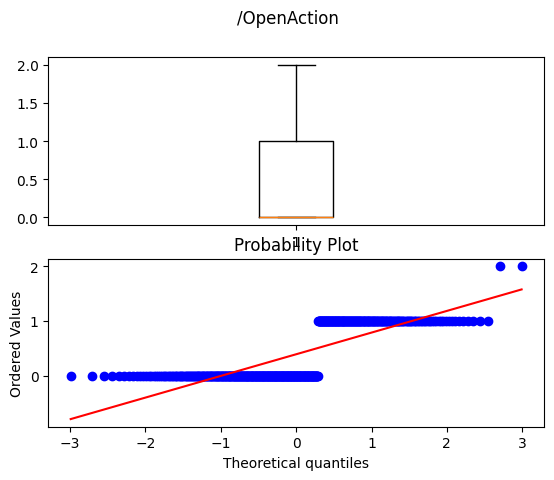

<Figure size 640x480 with 0 Axes>

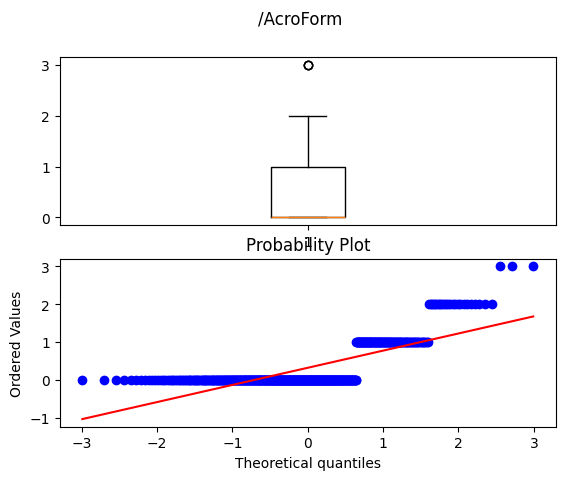

<Figure size 640x480 with 0 Axes>

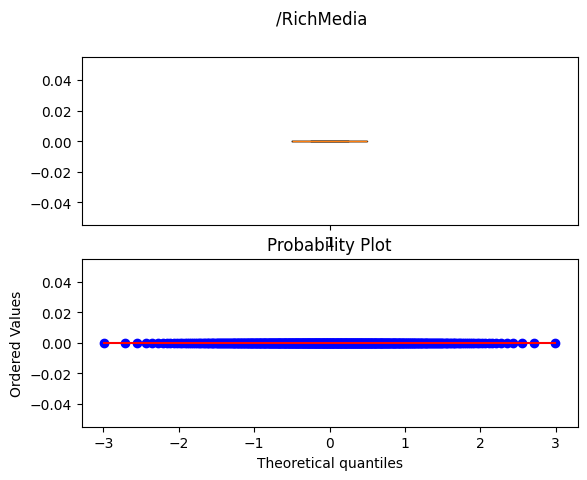

<Figure size 640x480 with 0 Axes>

In [44]:
columns = df.columns
for col in columns[:5]:
    data = df[col]
    fig, ax = plt.subplots(2, 1)
    ax[0].boxplot(data)
    stats.probplot(data, plot=plt)
    fig.suptitle(col)
    plt.show()
    plt.clf()

## 이상치 제거

In [48]:
Q1 = df.quantile(q=0.25)
Q3 = df.quantile(q=0.75)
IQR = Q3-Q1
print(Q1, Q3)
print(IQR)

/JS                0.00000
/AA                0.00000
/OpenAction        0.00000
/AcroForm          0.00000
/RichMedia         0.00000
/Launch            0.00000
/EmbeddedFile      0.00000
/XFA               0.00000
/URI               0.00000
/F                 0.00000
/GoToE             0.00000
/Extends           0.00000
/Annot             0.00000
/Length            0.00000
/Filter            2.00000
/FlateDecode       2.00000
/XObject           0.00000
/Encrypt           0.00000
/CreationDate      0.00000
/Author            1.00000
subject            1.00000
/ModDate           0.00000
html               1.00000
Script             0.00000
powershell.exe     0.00000
cmd.exe            0.00000
ascii_c            0.00000
sys                0.00000
root               0.00000
reg                0.00000
exe                1.00000
http               0.00000
domain             1.00000
filepath           3.00000
ascii              3.00000
xml                0.00000
dll                0.00000
u

In [70]:
post_df = df.copy()
print(post_df.shape)
iqr_mul = 1.5
for col in columns[:-1]:
    post_df = post_df[(post_df[col] <= Q3[col]+iqr_mul*IQR[col]) & (post_df[col] >= Q1[col]-iqr_mul*IQR[col])]
    print(f"{col}: {post_df.shape}")

(500, 55)
/JS: (493, 55)
/AA: (479, 55)
/OpenAction: (479, 55)
/AcroForm: (476, 55)
/RichMedia: (476, 55)
/Launch: (473, 55)
/EmbeddedFile: (448, 55)
/XFA: (436, 55)
/URI: (376, 55)
/F: (353, 55)
/GoToE: (353, 55)
/Extends: (332, 55)
/Annot: (332, 55)
/Length: (310, 55)
/Filter: (300, 55)
/FlateDecode: (298, 55)
/XObject: (292, 55)
/Encrypt: (292, 55)
/CreationDate: (292, 55)
/Author: (292, 55)
subject: (287, 55)
/ModDate: (287, 55)
html: (273, 55)
Script: (271, 55)
powershell.exe: (271, 55)
cmd.exe: (271, 55)
ascii_c: (271, 55)
sys: (271, 55)
root: (259, 55)
reg: (259, 55)
exe: (248, 55)
http: (248, 55)
domain: (248, 55)
filepath: (248, 55)
ascii: (248, 55)
xml: (248, 55)
dll: (232, 55)
unescape: (171, 55)
%u9090%u9090: (171, 55)
getIcon: (169, 55)
temptmp: (169, 55)
eval: (149, 55)
%appdata%: (149, 55)
chunk: (149, 55)
base64: (149, 55)
mkdir: (149, 55)
replace: (132, 55)
fromCharCode: (77, 55)
getAnnots: (75, 55)
ip: (75, 55)
xref_size: (71, 55)
trailer_size: (71, 55)
file_size: (71

- 모든 데이터에 적용할 경우, 500개에서 71개까지 줄어드는 현상을 볼 수 있음
- 따라서, 정규분포에서 많이 벗어나는 특정 컬럼에만 적용하여 작업을 진행 혹은 iqr_mul을 늘려서 작업 필요
- 본 연구에서는 c1, c2, c3, c4에만 적용